**Topic:**        Challenge Set 3  
**Subject:**      Explore Movie data  
**Date:**         10/2/2017  
**Name:**         Laura Howard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import seaborn as sns
import datetime as dt

pd.set_option('display.float_format', lambda x: '%.0f' % x)

%matplotlib inline

In [2]:
df = pd.read_csv('2013_movies.csv')

In [3]:
df.shape

(100, 7)

In [4]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


### Challenge 1

In [5]:
df.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [6]:
df['ReleaseDate'] = df['ReleaseDate'].map(dateutil.parser.parse)

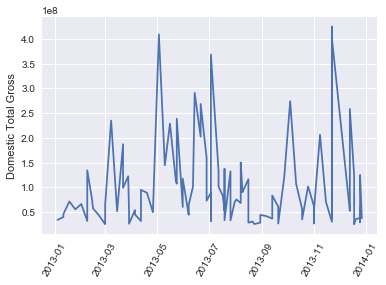

In [7]:
df = df.sort_values('ReleaseDate', ascending=True)
plt.plot(df['ReleaseDate'], df['DomesticTotalGross'])
plt.xticks(rotation=60);
plt.ylabel('Domestic Total Gross');


### Challenge 2

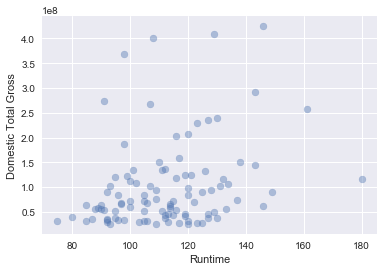

In [8]:
plt.scatter(df['Runtime'], df['DomesticTotalGross'], alpha=.4);
plt.xlabel('Runtime');
plt.ylabel('Domestic Total Gross');

### Challenge 3

In [9]:
df_rating = df.groupby(df['Rating']).mean().drop(['Budget'], axis=1)
df_rating

,DomesticTotalGross,Runtime
Rating,,
G,268492764,107
PG,131135716,100
PG-13,111449769,118
R,69892429,111


### Challenge 4

In [10]:
df_g = df[df['Rating'] == 'G']

In [11]:
df_pg = df[df['Rating'] == 'PG']

In [12]:
df_pg13 = df[df['Rating'] == 'PG-13']

In [13]:
df_r = df[df['Rating'] == 'R']

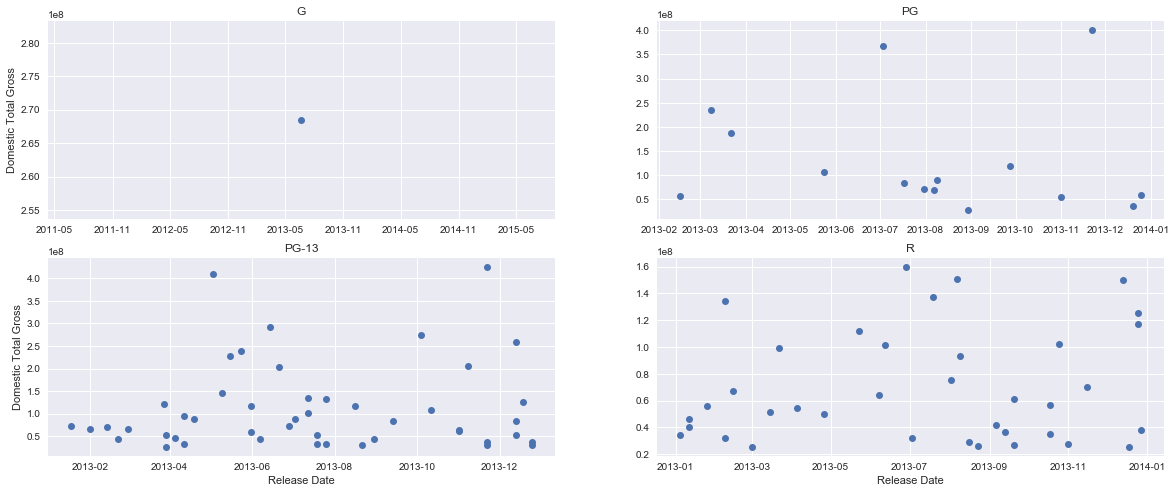

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 8))

ax1.plot_date(df_g['ReleaseDate'], df_g['DomesticTotalGross'])
ax1.set_ylabel('Domestic Total Gross')
ax1.set_title('G')

ax2.plot_date(df_pg['ReleaseDate'], df_pg['DomesticTotalGross'])
ax2.set_title('PG')

ax3.plot_date(df_pg13['ReleaseDate'], df_pg13['DomesticTotalGross'])
ax3.set_xlabel('Release Date')
ax3.set_ylabel('Domestic Total Gross')
ax3.set_title('PG-13')

ax4.plot_date(df_r['ReleaseDate'], df_r['DomesticTotalGross'])
ax4.set_xlabel('Release Date')
ax4.set_title('R');


### Challenge 5

In [15]:
df_director = df.groupby('Director').mean().drop(['Budget', 'Runtime'], axis=1).reset_index()

In [16]:
df_director.sort_values('DomesticTotalGross').head(1)

,Director,DomesticTotalGross
83,Spike Jonze,25568251


In my dataset, Spike Jonze has the highest Domestic Total Gross per movie.

### Challenge 6

In [17]:
df['ReleaseMonth'] = df['ReleaseDate'].dt.month

In [18]:
df_monthly = df.groupby('ReleaseMonth').agg({"DomesticTotalGross": [np.mean, np.std]})
df_monthly

DomesticTotalGross          
                           mean       std
ReleaseMonth                             
1                      49543237  14659469
2                      67386014  32831849
3                      96097096  73239417
4                      60940720  25301039
5                     177409720 111775447
6                     150650006  95199936
7                     105780722  91408365
8                      68531263  41322322
9                      61712314  34823269
10                    115027038  93943296
11                    137936760 153601101
12                     87483386  66838245

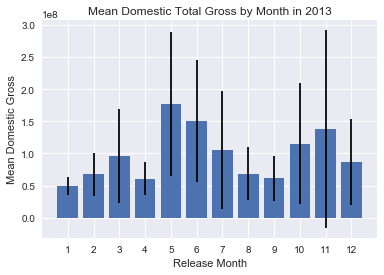

In [19]:
plt.bar(df_monthly.index, df_monthly['DomesticTotalGross']['mean'], yerr=df_monthly['DomesticTotalGross']['std'])
plt.xticks(df_monthly.index)
plt.xlabel('Release Month')
plt.ylabel('Mean Domestic Gross')
plt.title('Mean Domestic Total Gross by Month in 2013');